### Covariance and Correlation

Do instruments/assets move together (and to what extent)?

Three cases:

    . unrelated (no relationship/corelation)
    . moving together (positive relationship/correlation)
    . moving in opposite directions (negative relationship/ correlation)
    
Correlation between instruments/assets play an important role in portfolio management.

In [2]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.4f}'.format
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [5]:
close = pd.read_csv("close.csv", index_col="Date", parse_dates=["Date"])
close

,INFY.NS,TCS.NS,VEDL.NS,WIPRO.NS
Date,,,,
2014-01-01,433.5000,1076.6500,202.0000,207.2626
2014-01-02,435.0688,1083.5000,199.8500,207.3563
2014-01-03,445.6437,1111.1000,199.1500,208.7251
2014-01-06,439.7375,1119.8000,198.9500,209.2500
2014-01-07,432.1437,1103.0750,194.5000,206.3251
...,...,...,...,...
2024-01-31,1660.9000,3815.9500,273.8500,478.1500
2024-02-01,1657.0500,3854.1499,268.5000,471.3500
2024-02-02,1693.3500,3966.3000,272.5500,483.1500


In [9]:
close["RVEDL.NS"] = 1 / close["VEDL.NS"]
close

,INFY.NS,TCS.NS,VEDL.NS,WIPRO.NS,RVEDL.NS
Date,,,,,
2014-01-01,433.5000,1076.6500,202.0000,207.2626,0.0050
2014-01-02,435.0688,1083.5000,199.8500,207.3563,0.0050
2014-01-03,445.6437,1111.1000,199.1500,208.7251,0.0050
2014-01-06,439.7375,1119.8000,198.9500,209.2500,0.0050
2014-01-07,432.1437,1103.0750,194.5000,206.3251,0.0051
...,...,...,...,...,...
2024-01-31,1660.9000,3815.9500,273.8500,478.1500,0.0037
2024-02-01,1657.0500,3854.1499,268.5000,471.3500,0.0037
2024-02-02,1693.3500,3966.3000,272.5500,483.1500,0.0037


In [10]:
returns = close.apply(lambda x: np.log(x.dropna() / x.dropna().shift()))
returns

,INFY.NS,TCS.NS,VEDL.NS,WIPRO.NS,RVEDL.NS
Date,,,,,
2014-01-01,NaN,NaN,NaN,NaN,NaN
2014-01-02,0.0036,0.0063,-0.0107,0.0005,0.0107
2014-01-03,0.0240,0.0252,-0.0035,0.0066,0.0035
2014-01-06,-0.0133,0.0078,-0.0010,0.0025,0.0010
2014-01-07,-0.0174,-0.0150,-0.0226,-0.0141,0.0226
...,...,...,...,...,...
2024-01-31,0.0057,0.0040,0.0281,0.0119,-0.0281
2024-02-01,-0.0023,0.0100,-0.0197,-0.0143,0.0197
2024-02-02,0.0217,0.0287,0.0150,0.0247,-0.0150


In [11]:
returns.cov() # covariance (hard to interpret)

,INFY.NS,TCS.NS,VEDL.NS,WIPRO.NS,RVEDL.NS
INFY.NS,0.0003,0.0001,0.0001,0.0001,-0.0001
TCS.NS,0.0001,0.0002,0.0001,0.0001,-0.0001
VEDL.NS,0.0001,0.0001,0.0008,0.0001,-0.0008
WIPRO.NS,0.0001,0.0001,0.0001,0.0003,-0.0001
RVEDL.NS,-0.0001,-0.0001,-0.0008,-0.0001,0.0008


In [12]:
returns.corr() # correlation coefficent (easy to interpret)

,INFY.NS,TCS.NS,VEDL.NS,WIPRO.NS,RVEDL.NS
INFY.NS,1.0000,0.5514,0.1890,0.5031,-0.1890
TCS.NS,0.5514,1.0000,0.1667,0.4926,-0.1667
VEDL.NS,0.1890,0.1667,1.0000,0.2157,-1.0000
WIPRO.NS,0.5031,0.4926,0.2157,1.0000,-0.2157
RVEDL.NS,-0.1890,-0.1667,-1.0000,-0.2157,1.0000


Three cases:

    . no corelation: correlation coefficient == 0 
    . moving together: 0 < correlation coefficient <= 1 (Positive)
    . moving in opposite directions: -1 <= correlation coefficient < 0 (negative)

In [13]:
import seaborn as sns

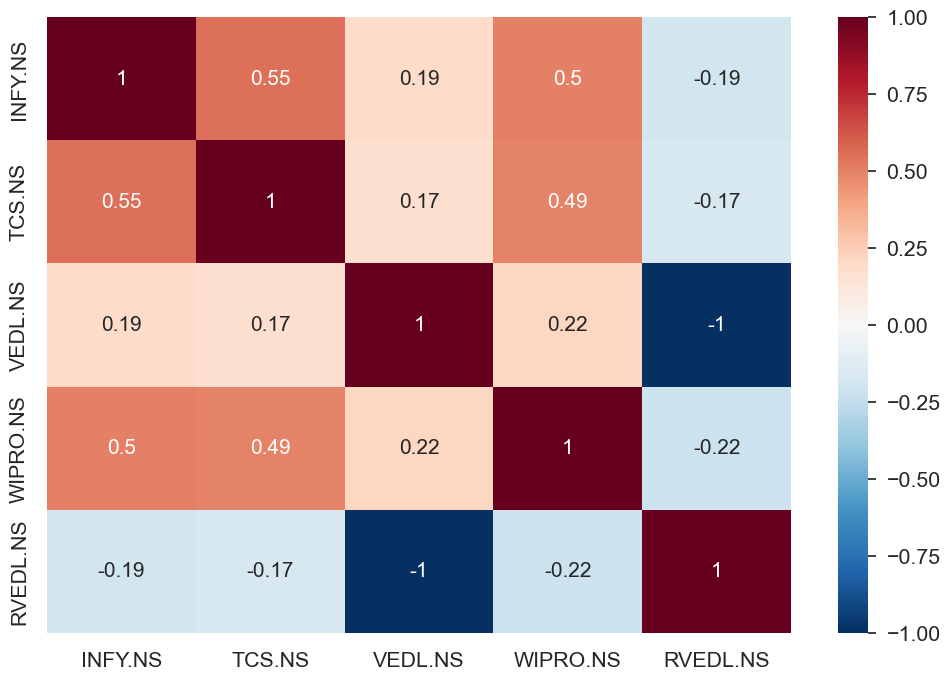

In [17]:
plt.figure(figsize = (12,8))
sns.set(font_scale = 1.4)
sns.heatmap(returns.corr(),  cmap = "RdBu_r", annot = True, annot_kws = {"size": 15}, vmin = -1, vmax = 1)
plt.show()

# Take Home: similar assets are (highly) positive correlated. Different assets exhibit low/no/negative correlation.

### In portfolio management it's beneficial to have assets with low/no/negative correlation (portfolio diversification effect).